# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np, pandas as pd

SEED = 42

# utility
def seed_everything(seed=SEED):
    np.random.seed(seed)
seed_everything()

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
train=pd.read_csv('../mental_health_sosmed_dataset.csv')
train.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level        

In [4]:
train.isnull().sum().sort_values(ascending=False)

person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
#Type your code here
# Top 10 person used social media
top_user = train['person_name'].value_counts().nlargest(10).reset_index()
top_user.columns = ['person_name', 'count']
px.bar(
    top_user, 
    x='person_name', y='count', 
    title="Top 10 person used social media",
    color='count', 
    color_continuous_scale='Viridis').show()

In [6]:
# Gender Distribution use social media
px.histogram(train, x='gender',nbins=20, title='Gender Distribution', color_discrete_sequence=['teal']).show()

In [7]:
# platform pie chart use social media
px.pie(train.groupby("platform").size().reset_index(name='count'), names="platform",values="count", title="Mental state distribution using social media", color_discrete_sequence=px.colors.qualitative.Pastel).show()

In [8]:
cols = ['negative_interactions_count','positive_interactions_count','anxiety_level','stress_level','mood_level']

for col in cols:
    px.histogram(
        train, 
        x=col, 
        nbins=20,
        title=f"{col} Distribution",
        color_discrete_sequence=['teal']
    ).show()

In [9]:
# mental_state pie chart use social media
px.pie(
    train.groupby("mental_state").size().reset_index(name="count"),
    names="mental_state",
    values="count",
    title="Mental State Distribution Using Social Media",
    color_discrete_sequence=px.colors.qualitative.Pastel
).show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
from sklearn.ensemble import RandomForestClassifier
import joblib

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,  LabelEncoder

In [11]:
df=train.copy()

le=LabelEncoder()
cat_cols=df.select_dtypes(include=['object','category']).columns

for col in cat_cols:
  df[col]=le.fit_transform(df[col].astype(str))
df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,630,35,0,1,1,320,160,1,2,7.4,28,2,7,6,2
1,553,24,6,0,1,453,226,1,3,6.7,15,3,8,5,2
2,164,26,54,1,2,357,196,1,2,7.2,24,3,7,6,2
3,540,66,16,0,2,190,105,0,1,8.0,41,2,6,6,2
4,625,31,40,1,2,383,211,1,2,7.1,22,3,7,6,2


In [12]:
cols=['person_name','age','date','gender']
df=df.drop(columns=cols,axis=1)

In [13]:
X = df.drop(['mental_state'],axis=1)
y = df['mental_state']
 
X.describe()

,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.98480,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,2.00992,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,0.00000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,1.00000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,3.00000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,5.00000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,6.00000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

X_train.shape

(4000, 10)

In [15]:
numeric_features = list(X.select_dtypes(include=['int64', 'float64']).columns)

In [16]:
standard_scaler = StandardScaler()
X_train[numeric_features] = standard_scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = standard_scaler.transform(X_test[numeric_features])
X_train.describe()

,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,3.197442e-17,2.220446e-17,1.842970e-16,1.287859e-17,1.207923e-16,-9.379164e-16,-6.217249e-17,-2.007283e-16,2.504663e-16,2.886580e-16
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.477293e+00,-2.207535e+00,-1.955996e+00,-1.559191e+00,-1.948980e+00,-1.382571e+00,-1.391689e+00,-1.895606e+00,-1.984251e+00,-2.134339e+00
25%,-9.783337e-01,-8.815572e-01,-8.059424e-01,2.433420e-01,-8.871548e-01,-8.177373e-01,-8.234886e-01,-6.410686e-01,-1.043290e+00,-8.219092e-01
50%,1.958414e-02,1.413397e-01,-7.663988e-02,2.433420e-01,1.746702e-01,-6.462634e-02,-1.605877e-01,6.134687e-01,-1.023295e-01,4.905207e-01
75%,1.017502e+00,8.232710e-01,7.823944e-01,2.433420e-01,1.746702e-01,8.767624e-01,8.811136e-01,6.134687e-01,8.386314e-01,4.905207e-01
max,1.516461e+00,1.391547e+00,2.279568e+00,2.045875e+00,2.298320e+00,2.194707e+00,2.206915e+00,1.868006e+00,1.779592e+00,1.802950e+00


In [17]:
param_dist = {
  "n_estimators": [100, 300, 500, 800],
  "max_depth": [None, 10, 20, 30, 50],
  "min_samples_split": [2, 5, 10],
  "min_samples_leaf": [1, 2, 4],
  "bootstrap": [True, False]
}

model=RandomForestClassifier()

rs=RandomizedSearchCV(estimator=model, param_distributions=param_dist,n_iter=15,scoring='accuracy',cv=3,n_jobs=1,verbose=1,random_state=42)
rs.fit(X_train,y_train)
best_model=rs.best_estimator_
joblib.dump(rs.best_params_, 'best_params_rf.pkl')

print("Best Parameters: ", rs.best_params_)
print("best score: ", rs.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
best score:  1.0


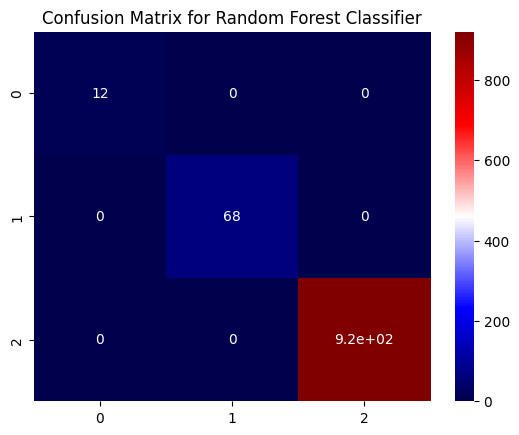

In [18]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

y_pred = best_model.predict(X_test)

acc=accuracy_score(y_test, y_pred)
prec=precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec=recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1=f1_score(y_test, y_pred, average='weighted', zero_division=0)

cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='seismic')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.savefig('confusion_matrix_rf.png')
plt.show()

In [19]:
roc_auc=None
roc_note=""
y_score=None

if hasattr(best_model, "predict_proba"):
  try:
    y_score= best_model.predict_proba(X_test)
  except Exception as e:
    roc_note+=f"Predict_proba failed: {e}\n"
    y_score=None

if y_score is None and hasattr(best_model, "decision_function"):
  try:
    y_score= best_model.decision_function(X_test)
  except Exception as e:
    roc_note+=f"Decision_function failed: {e}\n"
    y_score=None

if y_score is not None:
  y_score=np.asarray(y_score)
  try:
    if y_score.ndim == 1 :
      roc_auc=roc_auc_score(y_test, y_score)
    elif y_score.ndim == 2 and y_score.shape[1] == 2:
      roc_auc=roc_auc_score(y_test, y_score[:,1])
    else:
      roc_auc=roc_auc_score(y_test, y_score, multi_class='ovr', average='weighted')
  except ValueError as ve:
    roc_note+=f"ROC AUC calculation failed: {ve}\n"
else:
  roc_note+="No suitable scores for ROC AUC calculation.\n"

results = {
  'Accuracy': acc,
  'Precision': prec,
  'Recall': rec,
  'F1-Score': f1,
  'ROC AUC': roc_auc,
}

print("\nModels Performance Table ")
print(pd.DataFrame([results]),"\n\n")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))



Models Performance Table 
   Accuracy  Precision  Recall  F1-Score  ROC AUC
0       1.0        1.0     1.0       1.0      1.0 


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       920

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

